In [3]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
## Xgboost
#from xgboost import XGBRegressor

In [4]:
df=pd.read_csv("US_House_Price.csv")
df

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
0,2003-01-01,1808,144.400,1.97,14614.141,76,25.930,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
1,2003-02-01,1854,145.200,1.97,14614.141,82,25.930,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2,2003-03-01,1757,145.200,1.97,14614.141,98,25.930,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
3,2003-04-01,1803,145.900,1.83,14743.567,91,25.930,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
4,2003-05-01,1835,145.800,1.83,14743.567,101,25.930,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-08-01,1586,342.753,1.85,21851.134,51,48.021,16161.4,2.33,5.2225,1355,131202.0,-2.4,3.7,83.084,301.596
236,2022-09-01,1588,336.464,1.85,21851.134,44,48.021,16184.9,2.56,6.1120,1438,131202.0,-1.8,3.5,83.084,299.380
237,2022-10-01,1555,333.796,1.78,21989.981,43,48.021,16223.5,3.08,6.9000,1348,131202.0,-1.5,3.7,83.084,298.922
238,2022-11-01,1402,330.369,1.78,21989.981,41,48.021,16229.6,3.78,6.8050,1543,131202.0,-1.4,3.6,83.084,298.312


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    240 non-null    object 
 1   building_permits        240 non-null    int64  
 2   const_price_index       240 non-null    float64
 3   delinquency_rate        240 non-null    float64
 4   GDP                     240 non-null    float64
 5   house_for_sale_or_sold  240 non-null    int64  
 6   housing_subsidies       240 non-null    float64
 7   income                  240 non-null    float64
 8   interest_rate           240 non-null    float64
 9   mortgage_rate           240 non-null    float64
 10  construction_unit       240 non-null    int64  
 11  total_houses            240 non-null    float64
 12  total_const_spending    240 non-null    float64
 13  unemployment_rate       240 non-null    float64
 14  urban_population        240 non-null    fl

In [6]:
df.isnull().sum()

DATE                      0
building_permits          0
const_price_index         0
delinquency_rate          0
GDP                       0
house_for_sale_or_sold    0
housing_subsidies         0
income                    0
interest_rate             0
mortgage_rate             0
construction_unit         0
total_houses              0
total_const_spending      0
unemployment_rate         0
urban_population          0
home_price_index          0
dtype: int64

In [7]:
df.describe()

,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,1309.350000,212.851467,4.876750,18095.159938,55.550000,34.677450,13493.480833,1.301625,4.683308,1201.716667,121344.45000,0.324583,6.012083,81.261200,180.657817
std,479.881055,44.566715,3.305235,2002.293963,25.383865,6.006483,1837.485256,1.578512,1.110667,423.857641,6113.86894,1.950373,2.034118,1.055429,41.255706
min,513.000000,144.400000,1.410000,14614.141000,20.000000,25.930000,10674.000000,0.050000,2.684000,520.000000,111278.00000,-5.900000,3.500000,79.583000,128.461000
25%,979.000000,184.275000,2.087500,16547.088000,36.000000,29.785000,12115.575000,0.120000,3.801375,839.000000,116590.00000,-0.800000,4.575000,80.395750,148.123000
50%,1285.500000,207.450000,3.525000,17576.126000,49.000000,33.544500,12999.350000,0.400000,4.456750,1181.500000,121771.50000,0.800000,5.400000,81.209000,172.496500
75%,1685.000000,224.525000,7.830000,19716.162500,71.000000,37.877250,14820.075000,2.000000,5.752500,1440.000000,126564.50000,1.600000,7.350000,82.107500,197.462000
max,2263.000000,353.015000,11.480000,21989.981000,127.000000,48.021000,20422.600000,5.260000,6.900000,2245.000000,131202.00000,5.000000,14.700000,83.084000,304.755000


In [8]:
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_11156\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
building_permits,1.000000,0.019257,-0.875323,0.024326,0.898774,-0.049066,-0.002308,0.460288,0.277873,0.912469,-0.139062,0.251822,-0.596946,-0.098493,0.381115
const_price_index,0.019257,1.000000,-0.137499,0.903544,-0.253345,0.929301,0.852999,-0.221350,-0.462025,-0.155879,0.859014,0.087594,-0.269647,0.887220,0.888823
delinquency_rate,-0.875323,-0.137499,1.000000,-0.207767,-0.777171,-0.105088,-0.177342,-0.567909,-0.294565,-0.883472,-0.039734,-0.009754,0.734091,-0.072721,-0.535645
GDP,0.024326,0.903544,-0.207767,1.000000,-0.243185,0.945420,0.950751,-0.203934,-0.616564,-0.162686,0.971317,0.177598,-0.385391,0.979199,0.837699
house_for_sale_or_sold,0.898774,-0.253345,-0.777171,-0.243185,1.000000,-0.274603,-0.215879,0.494941,0.397134,0.904837,-0.377435,0.173959,-0.393907,-0.336039,0.122313
housing_subsidies,-0.049066,0.929301,-0.105088,0.945420,-0.274603,1.000000,0.952907,-0.319337,-0.627004,-0.230655,0.937864,0.165387,-0.156554,0.964949,0.828885
income,-0.002308,0.852999,-0.177342,0.950751,-0.215879,0.952907,1.000000,-0.288197,-0.682199,-0.180940,0.943165,0.187499,-0.195203,0.964562,0.788287
interest_rate,0.460288,-0.221350,-0.567909,-0.203934,0.494941,-0.319337,-0.288197,1.000000,0.711946,0.685797,-0.348477,-0.390472,-0.513716,-0.347749,0.135246
mortgage_rate,0.277873,-0.462025,-0.294565,-0.616564,0.397134,-0.627004,-0.682199,0.711946,1.000000,0.540901,-0.716116,-0.462693,-0.184545,-0.707341,-0.218551
construction_unit,0.912469,-0.155879,-0.883472,-0.162686,0.904837,-0.230655,-0.180940,0.685797,0.540901,1.000000,-0.336594,-0.012145,-0.562032,-0.296401,0.268593


<Axes: xlabel='total_houses', ylabel='Count'>

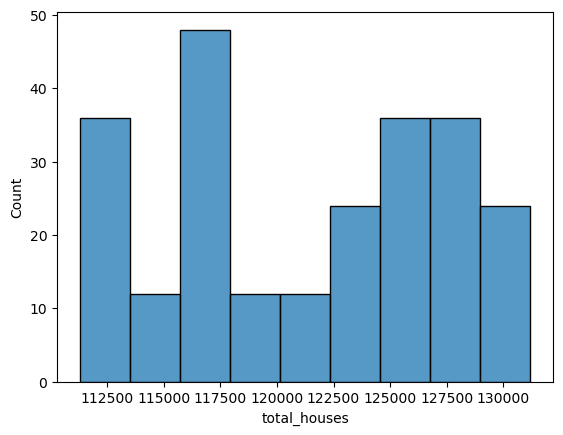

In [9]:
sns.histplot(df['total_houses'])

<Axes: xlabel='interest_rate', ylabel='total_houses'>

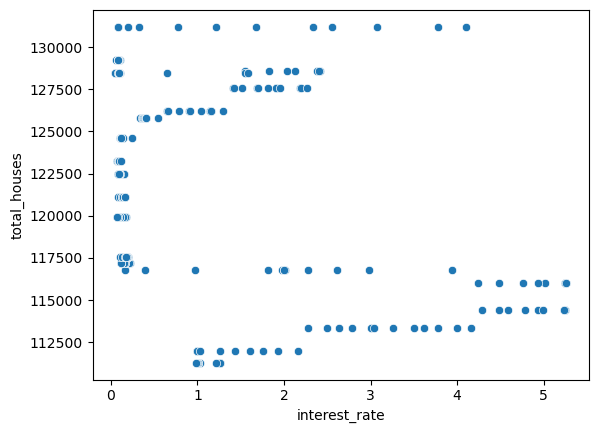

In [10]:
sns.scatterplot(x=df['interest_rate'], y=df['total_houses'])

<Axes: >

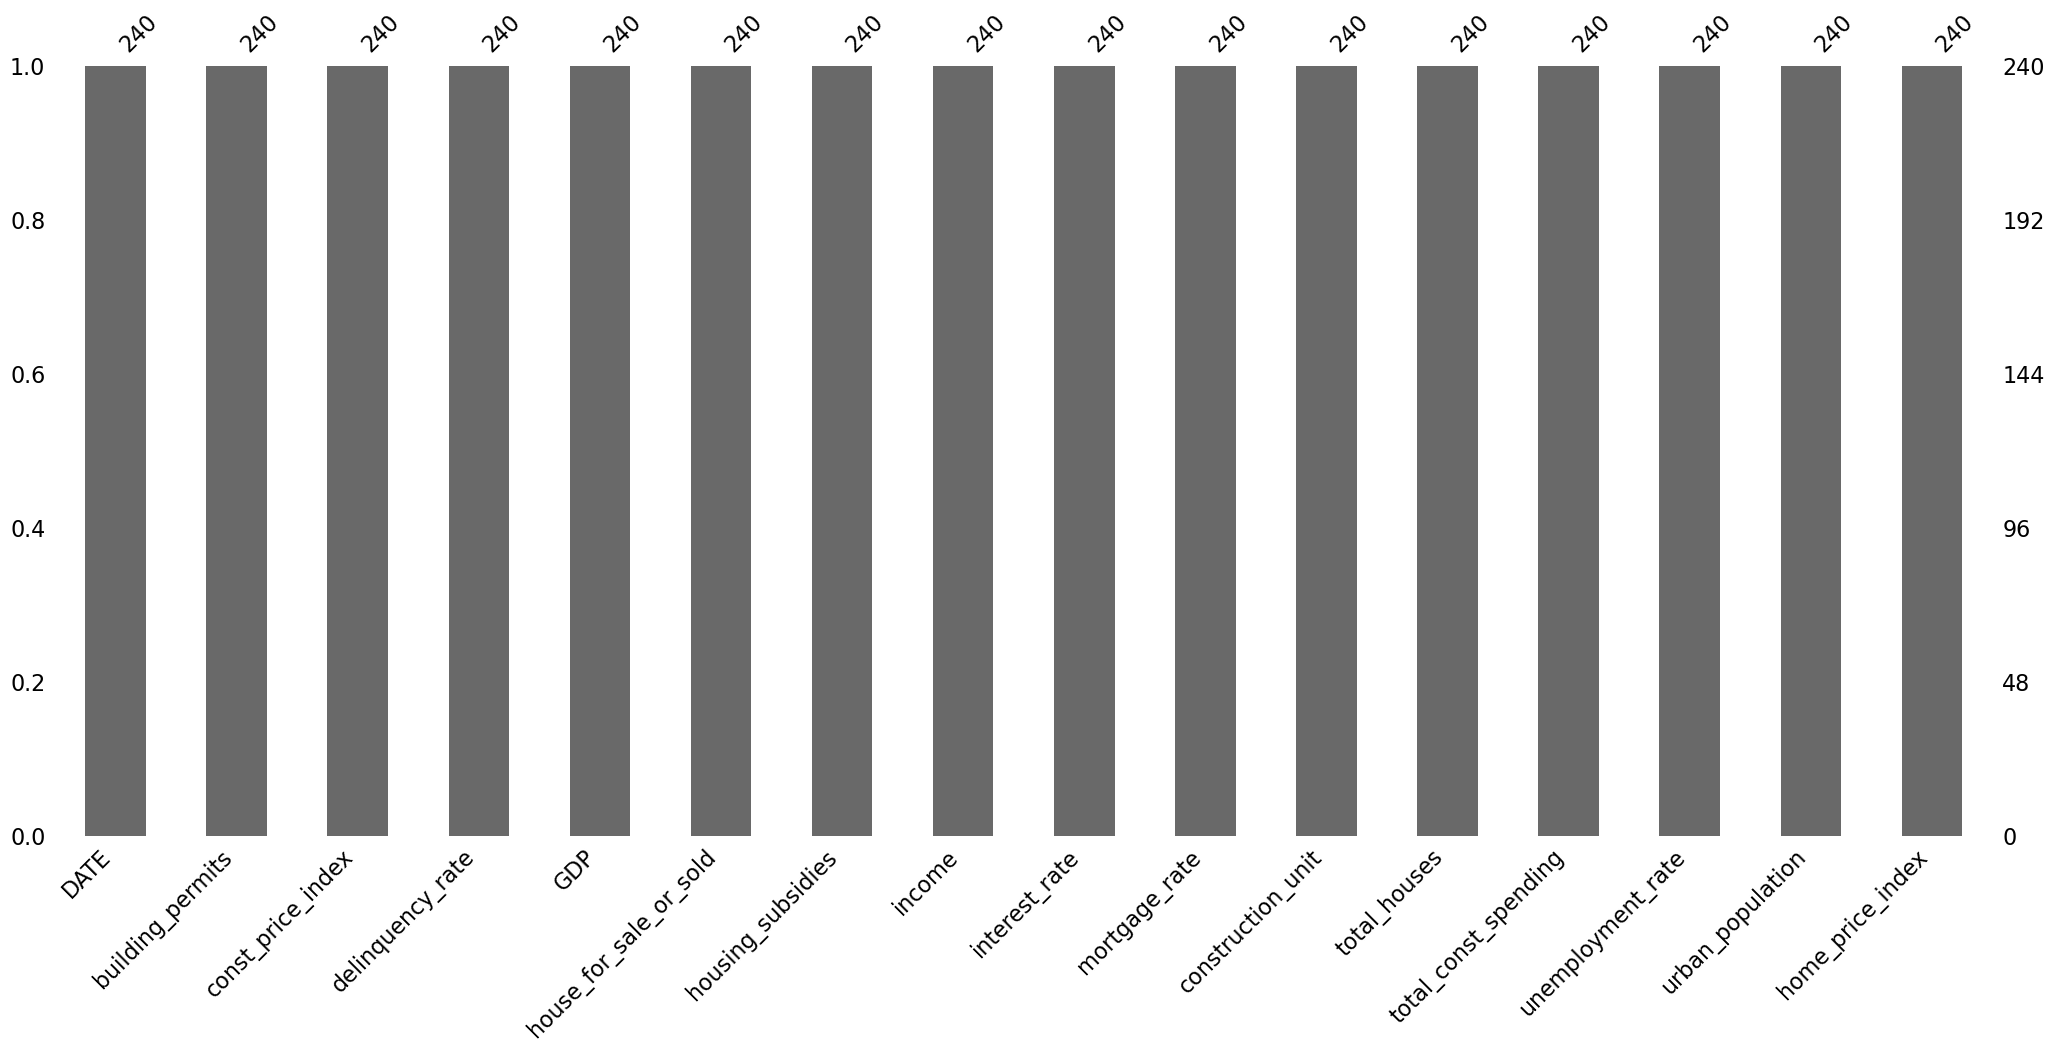

In [11]:
missingno.bar(df)

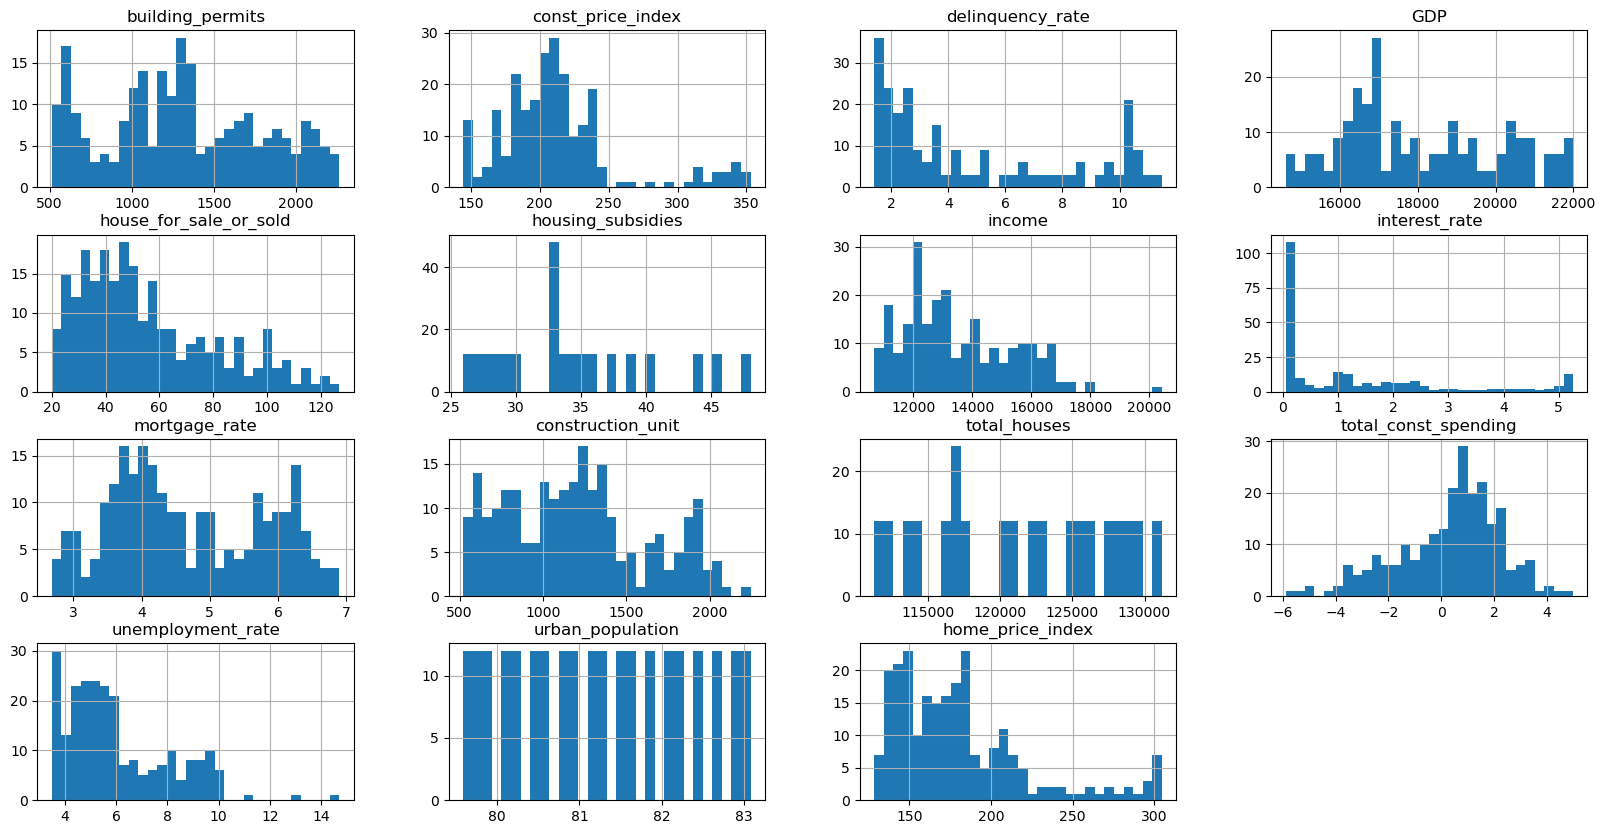

In [12]:
df.hist(bins=30, figsize=(20, 10))
plt.show()

In [13]:
# Assuming 'DATE' is in the format 'YYYY-MM-DD'
df['Year'] = pd.to_datetime(df['DATE']).dt.year
df['Month'] = pd.to_datetime(df['DATE']).dt.month
df['Day'] = pd.to_datetime(df['DATE']).dt.day

In [14]:
df

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index,Year,Month,Day
0,2003-01-01,1808,144.400,1.97,14614.141,76,25.930,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461,2003,1,1
1,2003-02-01,1854,145.200,1.97,14614.141,82,25.930,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355,2003,2,1
2,2003-03-01,1757,145.200,1.97,14614.141,98,25.930,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148,2003,3,1
3,2003-04-01,1803,145.900,1.83,14743.567,91,25.930,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884,2003,4,1
4,2003-05-01,1835,145.800,1.83,14743.567,101,25.930,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735,2003,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-08-01,1586,342.753,1.85,21851.134,51,48.021,16161.4,2.33,5.2225,1355,131202.0,-2.4,3.7,83.084,301.596,2022,8,1
236,2022-09-01,1588,336.464,1.85,21851.134,44,48.021,16184.9,2.56,6.1120,1438,131202.0,-1.8,3.5,83.084,299.380,2022,9,1
237,2022-10-01,1555,333.796,1.78,21989.981,43,48.021,16223.5,3.08,6.9000,1348,131202.0,-1.5,3.7,83.084,298.922,2022,10,1
238,2022-11-01,1402,330.369,1.78,21989.981,41,48.021,16229.6,3.78,6.8050,1543,131202.0,-1.4,3.6,83.084,298.312,2022,11,1


In [15]:
 df = df.drop(columns=['DATE'])


In [16]:
X = df.drop(columns=['home_price_index'], axis=1)   ## Features
y = df['home_price_index']   ## target

In [17]:
X.shape

(240, 17)

In [18]:
y.shape

(240,)

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (160, 17)
y_train shape --  (160,)
X_test shape --  (80, 17)
y_test shape --  (80,)


In [20]:
linear_reg_model = LinearRegression()

In [21]:
# Fit the Linear Regression model
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [22]:
linear_reg_model.score(X_train, y_train)

0.9905066139483855

In [39]:
# Random Forest
random_forest_model = RandomForestRegressor(n_estimators=5, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_score = random_forest_model.score(X_test, y_test)
print( random_forest_score)


0.9876135929982931


In [26]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_score = decision_tree_model.score(X_test, y_test)
print(decision_tree_score)

0.9877757305390585


In [27]:


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Ridge model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print( r2)

0.9867210095852013


In [28]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso model
lasso_model = Lasso(alpha=0.1, random_state=42)

# Train the model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print( r2)

0.9862397115311116


In [29]:
# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_score = knn_model.score(X_test, y_test)
print(knn_score)

0.9804693376946865


In [30]:
# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)
best_params_rf = rf_grid.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Train the model using the best parameters
final_rf_model = RandomForestRegressor(**best_params_rf)
final_rf_model.fit(X_train_scaled, y_train)

# Evaluate the Random Forest model
y_pred_rf = final_rf_model.predict(X_test_scaled)

rf_r2 = r2_score(y_test, y_pred_rf)
print( rf_r2)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9969558326568299


In [31]:
# Hyperparameters for KNN
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the KNN model
knn_model = KNeighborsRegressor()

# Perform GridSearchCV for KNN
knn_grid = GridSearchCV(knn_model, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

# Get the best parameters for KNN
best_params_knn = knn_grid.best_params_
print(f"Best parameters for KNN: {best_params_knn}")

# Train the KNN model using the best parameters
knn_model = KNeighborsRegressor(**best_params_knn)
knn_model.fit(X_train, y_train)

# Make predictions on the test set using KNN
y_pred_knn = knn_model.predict(X_test)

# Calculate R2 score for KNN
r2_knn = r2_score(y_test, y_pred_knn)
print(r2_knn)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.9944916156974039


In [32]:
# Hyperparameters for Decision Tree
tree_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['mse', 'friedman_mse', 'poisson', 'absolute_error']
}

# Create the Decision Tree model
tree_model = DecisionTreeRegressor()

# Perform GridSearchCV for Decision Tree
tree_grid = GridSearchCV(tree_model, tree_params, cv=5)
tree_grid.fit(X_train, y_train)

# Get the best parameters for Decision Tree
best_params_tree = tree_grid.best_params_
print(f"Best parameters for Decision Tree: {best_params_tree}")

# Train the Decision Tree model using the best parameters
tree_model = DecisionTreeRegressor(**best_params_tree)
tree_model.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree
y_pred_tree = tree_model.predict(X_test)

# Calculate R2 score for Decision Tree
r2_tree = r2_score(y_test, y_pred_tree)
print(r2_tree)

Best parameters for Decision Tree: {'criterion': 'poisson', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9840302680136528


C:\Users\hp\anacond\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anacond\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anacond\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\hp\anacond\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\hp\anacond\lib\site-packages\sklearn\base.py", line 581, in _validate_para

In [33]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'tol': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 5000]
}

# Create the Lasso model
lasso_model = Lasso(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_lasso = grid_search.best_params_
print(f"Best parameters for Lasso: {best_params_lasso}")

# Train the model using the best parameters
final_lasso_model = Lasso(**best_params_lasso)
final_lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = final_lasso_model.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print( r2)

Best parameters for Lasso: {'alpha': 0.1, 'max_iter': 1000, 'tol': 0.0001}
0.9862397115311116


In [34]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'tol': [0.0001, 0.001, 0.01],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Create the Ridge model
ridge_model = Ridge(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_ridge = grid_search.best_params_
print(f"Best parameters for Ridge: {best_params_ridge}")

# Train the model using the best parameters
final_ridge_model = Ridge(**best_params_ridge)
final_ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = final_ridge_model.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print( r2)


C:\Users\hp\anacond\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anacond\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anacond\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anacond\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anacond\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for Ridge: {'alpha': 0.1, 'solver': 'sparse_cg', 'tol': 0.0001}
0.9873713830172329


In [35]:
import pandas as pd

# Calculate R-squared scores for each model
rf_r2 = r2_score(y_test, y_pred_rf)
knn_r2 = r2_score(y_test, y_pred_knn)
tree_r2 = r2_score(y_test, y_pred_tree)
lasso_r2 = r2_score(y_test,y_pred)
ridge_r2 = r2_score(y_test, y_pred)

# Create a DataFrame with the model scores
models = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Decision Tree', 'Lasso', 'Ridge'],
    'Score': [rf_r2, knn_r2, tree_r2, lasso_r2, ridge_r2]
})

# Sort the DataFrame by score in descending order
models = models.sort_values(by='Score', ascending=False)

# Print the sorted DataFrame
print(models)

           Model     Score
0  Random Forest  0.996956
1            KNN  0.994492
3          Lasso  0.987371
4          Ridge  0.987371
2  Decision Tree  0.984030


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score


# Create the pipeline for each model
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

dt_pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor())
])

rf_pipeline = Pipeline([
    ('regressor', RandomForestRegressor())
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

# List of pipelines for iteration
pipelines = [
    ('Linear Regression', linear_pipeline),
    ('Ridge', ridge_pipeline),
    ('Lasso', lasso_pipeline),
    ('Decision Tree', dt_pipeline),
    ('Random Forest', rf_pipeline),
    ('K-Nearest Neighbors', knn_pipeline)
]

# Evaluate each model in the pipeline
for model_name, model in pipelines:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mdse = median_absolute_error(y_test, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Median Squared Error: {mdse}")
    print(f"R2 Score: {r2}")
    print()

Linear Regression Metrics:
Mean Absolute Error: 3.7394284535538547
Mean Squared Error: 20.75273236538735
Median Squared Error: 3.3880287063835937
R2 Score: 0.9878542549505788

Ridge Metrics:
Mean Absolute Error: 3.862368991896421
Mean Squared Error: 22.689043203158157
Median Squared Error: 3.2341101305209747
R2 Score: 0.9867210095852013

Lasso Metrics:
Mean Absolute Error: 4.211712532462746
Mean Squared Error: 27.342994188011367
Median Squared Error: 3.5862332867659177
R2 Score: 0.9839972380287962

Decision Tree Metrics:
Mean Absolute Error: 3.2700625000000003
Mean Squared Error: 26.588916887499984
Median Squared Error: 1.4639999999999986
R2 Score: 0.9844385693425871

Random Forest Metrics:
Mean Absolute Error: 1.7837556249999906
Mean Squared Error: 6.693039226421211
Median Squared Error: 1.2400349999999492
R2 Score: 0.9960828315703878

K-Nearest Neighbors Metrics:
Mean Absolute Error: 3.8228425000000015
Mean Squared Error: 40.2312863535
Median Squared Error: 2.1668999999999983
R2 Scor